In [2]:
import numpy as np

# Function to clean and load LibSVM formatted data from file
def load_and_clean_libsvm_data(filename):
    data = []
    labels = []
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 0:  # Skip empty lines
                continue
            try:
                labels.append(int(parts[0]))  # First element is the class label (+1 or -1)
                features = np.zeros(8)  # Assuming there are 8 features
                for item in parts[1:]:
                    index, value = item.split(":")
                    features[int(index) - 1] = float(value)  # index is 1-based in LibSVM format
                data.append(features)
            except Exception as e:
                print(f"Skipping line due to formatting issue: {line.strip()} -> {e}")
                continue
    return np.array(data), np.array(labels)

# Load and clean the dataset
X, y = load_and_clean_libsvm_data('Diabetes.txt')

# Perceptron model implementation
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.sign(linear_output)

                if y[idx] * y_predicted <= 0:
                    self.weights += self.learning_rate * y[idx] * x_i
                    self.bias += self.learning_rate * y[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.sign(linear_output)

# Train the Perceptron model
perceptron = Perceptron(learning_rate=0.01, n_iterations=1000)
perceptron.fit(X, y)

# Make predictions
predictions = perceptron.predict(X)

# Calculate accuracy
accuracy = np.mean(predictions == y) * 100
print(f"Model Accuracy: {accuracy:.2f}%")

# Optionally, print weights and bias
print("Weights:", perceptron.weights)
print("Bias:", perceptron.bias)


Model Accuracy: 69.66%
Weights: [ 1.02500000e-05 -6.31064685e-02  1.21500430e-02  1.33192800e-02
  1.27905010e-02 -4.45369321e-02 -2.56845180e-03 -2.86662000e-02]
Bias: 3.469446951953614e-18


In [3]:
import numpy as np

# Function to load LibSVM formatted data from file
def load_libsvm_data(filename):
    data = []
    labels = []
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split()
            labels.append(int(parts[0]))  # First element is the class label
            features = np.zeros(8)  # Assuming there are 8 features as per the file
            for item in parts[1:]:
                index, value = item.split(":")
                features[int(index) - 1] = float(value)
            data.append(features)
    return np.array(data), np.array(labels)

# Load the dataset
X, y = load_libsvm_data('Diabetes.txt')

# Perceptron model
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.sign(linear_output)

                if y[idx] * y_predicted <= 0:
                    self.weights += self.learning_rate * y[idx] * x_i
                    self.bias += self.learning_rate * y[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.sign(linear_output)

# Train the Perceptron model
perceptron = Perceptron(learning_rate=0.01, n_iterations=1000)
perceptron.fit(X, y)

# Make predictions
predictions = perceptron.predict(X)

# Calculate accuracy
accuracy = np.mean(predictions == y) * 100
print(f"Model Accuracy: {accuracy:.2f}%")

# Optionally, you can print the weights and bias to understand the model
print("Weights:", perceptron.weights)
print("Bias:", perceptron.bias)


Model Accuracy: 69.66%
Weights: [ 1.02500000e-05 -6.31064685e-02  1.21500430e-02  1.33192800e-02
  1.27905010e-02 -4.45369321e-02 -2.56845180e-03 -2.86662000e-02]
Bias: 3.469446951953614e-18


Model Accuracy: 69.66%


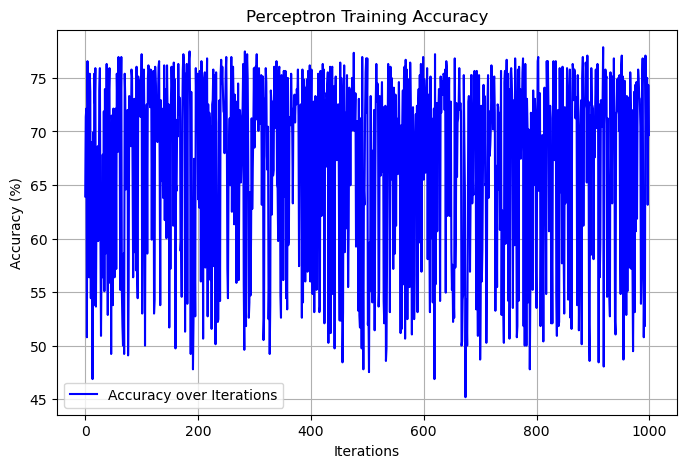

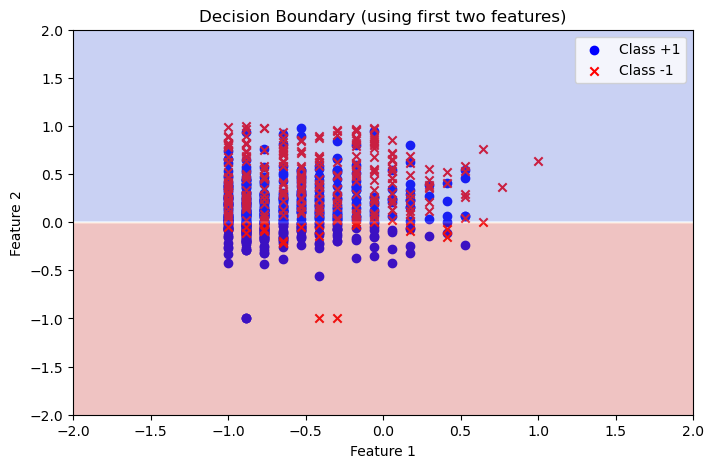

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Function to clean and load LibSVM formatted data from file
def load_and_clean_libsvm_data(filename):
    data = []
    labels = []
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 0:  # Skip empty lines
                continue
            try:
                labels.append(int(parts[0]))  # First element is the class label (+1 or -1)
                features = np.zeros(8)  # Assuming there are 8 features
                for item in parts[1:]:
                    index, value = item.split(":")
                    features[int(index) - 1] = float(value)  # index is 1-based in LibSVM format
                data.append(features)
            except Exception as e:
                print(f"Skipping line due to formatting issue: {line.strip()} -> {e}")
                continue
    return np.array(data), np.array(labels)

# Perceptron model implementation with accuracy tracking
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.accuracy_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.sign(linear_output)

                # Weight and bias update
                if y[idx] * y_predicted <= 0:
                    self.weights += self.learning_rate * y[idx] * x_i
                    self.bias += self.learning_rate * y[idx]

            # Record accuracy after each iteration
            y_predicted_all = self.predict(X)
            accuracy = np.mean(y_predicted_all == y) * 100
            self.accuracy_history.append(accuracy)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.sign(linear_output)

# Function to visualize the accuracy over iterations
def plot_accuracy(accuracy_history):
    plt.figure(figsize=(8, 5))
    plt.plot(range(len(accuracy_history)), accuracy_history, color='blue', label='Accuracy over Iterations')
    plt.title('Perceptron Training Accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy (%)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Function to visualize predictions for the first two features
def plot_decision_boundary(X, y, model):
    plt.figure(figsize=(8, 5))
    
    # Plot the true data points
    plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], color='blue', label='Class +1', marker='o')
    plt.scatter(X[:, 0][y == -1], X[:, 1][y == -1], color='red', label='Class -1', marker='x')

    # Create a meshgrid for decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel(), np.zeros((xx.ravel().shape[0], 6))]  # Only plot using first two features
    
    # Predict using the perceptron model
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.title('Decision Boundary (using first two features)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Load and clean the dataset
X, y = load_and_clean_libsvm_data('Diabetes.txt')

# Train the Perceptron model
perceptron = Perceptron(learning_rate=0.01, n_iterations=1000)
perceptron.fit(X, y)

# Make predictions and print the final accuracy
predictions = perceptron.predict(X)
accuracy = np.mean(predictions == y) * 100
print(f"Model Accuracy: {accuracy:.2f}%")

# Visualize the accuracy over iterations
plot_accuracy(perceptron.accuracy_history)

# Visualize the decision boundary using the first two features
plot_decision_boundary(X, y, perceptron)


In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('./diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


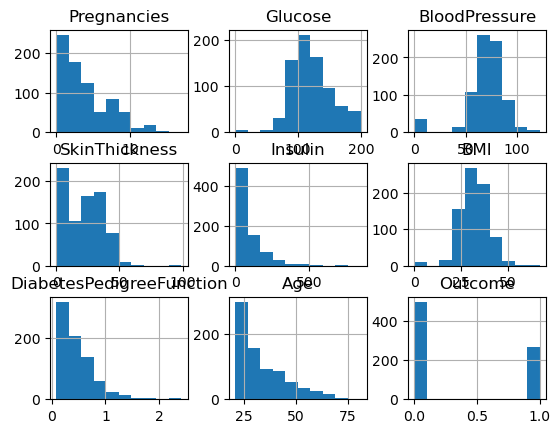

In [9]:
df.hist()
plt.show()

Iteration 1/1000 -> Accuracy: 0.6771, Misclassifications: 248
Iteration 101/1000 -> Accuracy: 0.7018, Misclassifications: 229
Iteration 201/1000 -> Accuracy: 0.6979, Misclassifications: 232
Iteration 301/1000 -> Accuracy: 0.6810, Misclassifications: 245
Iteration 401/1000 -> Accuracy: 0.7070, Misclassifications: 225
Iteration 501/1000 -> Accuracy: 0.6914, Misclassifications: 237
Iteration 601/1000 -> Accuracy: 0.6940, Misclassifications: 235
Iteration 701/1000 -> Accuracy: 0.7031, Misclassifications: 228
Iteration 801/1000 -> Accuracy: 0.6849, Misclassifications: 242
Iteration 901/1000 -> Accuracy: 0.7044, Misclassifications: 227
Iteration 1000/1000 -> Accuracy: 0.6953, Misclassifications: 234
Final Model Accuracy: 69.66%


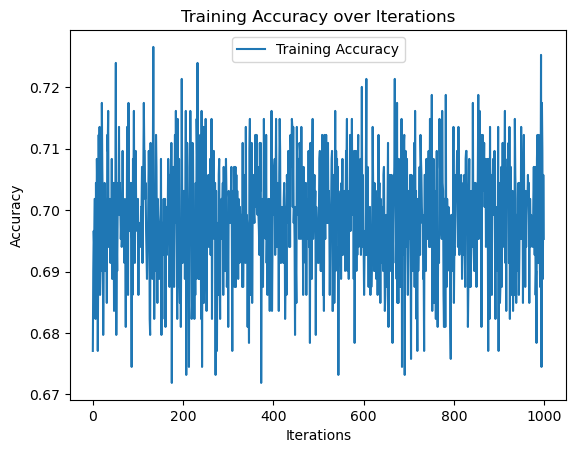

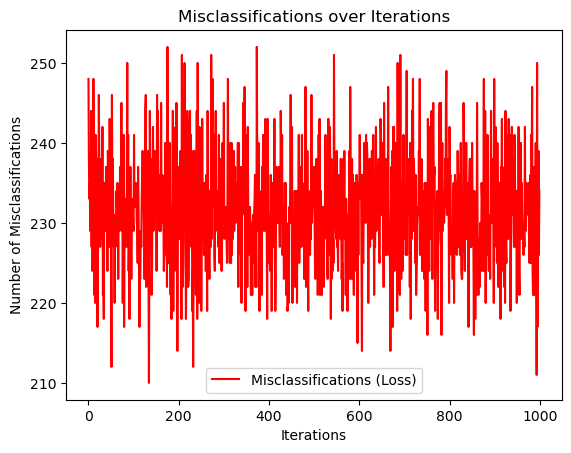

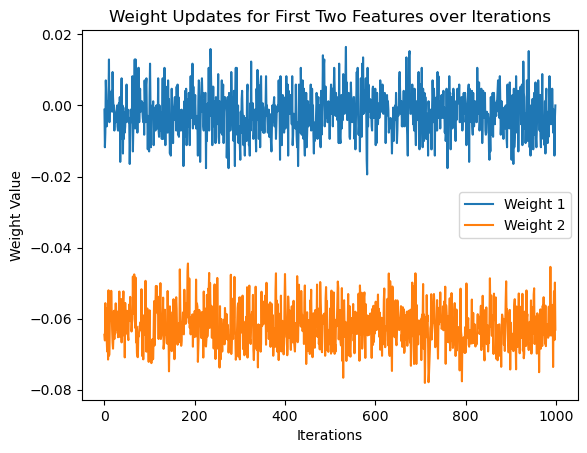

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# clean and load the file 
def load_and_clean_libsvm_data(filename):
    data = []
    labels = []
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 0:  
                continue
            try:
                labels.append(int(parts[0]))  # First element is the class label (+1 or -1)
                features = np.zeros(8)  # assuming that there are 8 features 
                for item in parts[1:]:
                    index, value = item.split(":")
                    features[int(index) - 1] = float(value) 
                data.append(features)
            except Exception as e:
                print(f"Skipping line due to formatting issue: {line.strip()} -> {e}")
                continue
    return np.array(data), np.array(labels)

# load and clean the dataset 
X, y = load_and_clean_libsvm_data('Diabetes.txt')

# codes for perceptron training 
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.training_accuracy = []  # tracking the accuracy
        self.loss_history = []  # tracking the missclaffications 
        self.weight_history = []  # tracking how weights evolve

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for iteration in range(self.n_iterations):
            correct_classifications = 0
            misclassifications = 0

            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.sign(linear_output)

                if y[idx] * y_predicted > 0:
                    correct_classifications += 1
                else:
                    misclassifications += 1

                # following the rules for perception, the weights and bias should change if misclassified 
                if y[idx] * y_predicted <= 0:
                    self.weights += self.learning_rate * y[idx] * x_i
                    self.bias += self.learning_rate * y[idx]

            # accuracy calculation
            accuracy = correct_classifications / n_samples
            self.training_accuracy.append(accuracy)
            self.loss_history.append(misclassifications)
            self.weight_history.append(self.weights.copy())  

            # for every 100 iterations, record the data
            if iteration % 100 == 0 or iteration == self.n_iterations - 1:
                print(f"Iteration {iteration + 1}/{self.n_iterations} -> Accuracy: {accuracy:.4f}, Misclassifications: {misclassifications}")

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.sign(linear_output)

    # Plot training accuracy over iterations
    def plot_training_accuracy(self):
        plt.figure()
        plt.plot(range(self.n_iterations), self.training_accuracy, label="Training Accuracy")
        plt.title("Training Accuracy over Iterations")
        plt.xlabel("Iterations")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()

    #  number of misclassifications (loss) over iterations
    def plot_loss(self):
        plt.figure()
        plt.plot(range(self.n_iterations), self.loss_history, label="Misclassifications (Loss)", color="red")
        plt.title("Misclassifications over Iterations")
        plt.xlabel("Iterations")
        plt.ylabel("Number of Misclassifications")
        plt.legend()
        plt.show()

    # visualize how the weights change over iterations 
    def plot_weight_updates(self):
        weight_history = np.array(self.weight_history)
        plt.figure()
        plt.plot(range(self.n_iterations), weight_history[:, 0], label="Weight 1")
        plt.plot(range(self.n_iterations), weight_history[:, 1], label="Weight 2")
        plt.title("Weight Updates for First Two Features over Iterations")
        plt.xlabel("Iterations")
        plt.ylabel("Weight Value")
        plt.legend()
        plt.show()

# training the model
perceptron = Perceptron(learning_rate=0.01, n_iterations=1000)
perceptron.fit(X, y)

# making predictions 
predictions = perceptron.predict(X)

# calculating accuracy
accuracy = np.mean(predictions == y) * 100
print(f"Final Model Accuracy: {accuracy:.2f}%")

# visualizing accuracy 
perceptron.plot_training_accuracy()

# visualizing loss over accuracy 
perceptron.plot_loss()

# visualizing weight updates 
perceptron.plot_weight_updates()
